In [8]:
from sklearn.datasets import fetch_olivetti_faces

In [9]:
olivetti=fetch_olivetti_faces()

In [10]:
olivetti.DESCR

'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and \nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position \n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n    ======

In [11]:
X=olivetti.data
y=olivetti.target

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.15,shuffle=True,stratify=y)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=.15,shuffle=True,stratify=y_train)

In [13]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)


(289, 4096) (289,)
(51, 4096) (51,)
(60, 4096) (60,)


In [14]:
from sklearn.decomposition import PCA
import tensorflow as tf
import numpy as np
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
pca=PCA(n_components=.99)
X_train_pca=pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)


In [15]:
pca.n_components_

203

In [16]:
from sklearn.cluster import KMeans
k_range=range(5,150,5)
kmeans_per_k=[]
for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_train_pca)
    kmeans_per_k.append(kmeans)

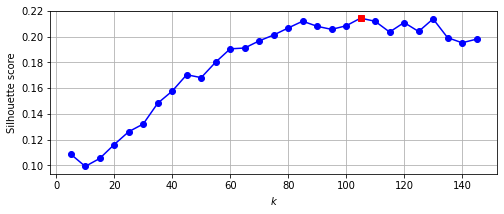

In [17]:
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.plot(best_k, best_score, "rs")
plt.grid()
plt.show()

In [18]:
best_k

105

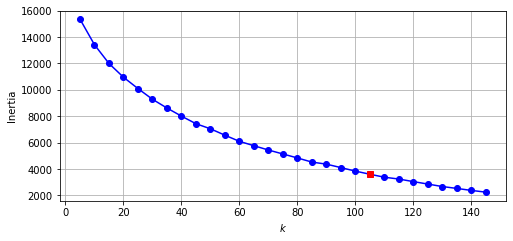

In [19]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(best_k, best_inertia, "rs")
plt.grid()
plt.show()

In [20]:
best_k

105

In [21]:
best_model=kmeans_per_k[best_index]